In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def EvenExtension(f):
  fe = np.concatenate((f, np.fliplr(f[:, 1:-1])), axis=1)
  fe = np.concatenate((fe, np.flipud(fe[1:-1,:])), axis=0)
  return fe

def IEvenExtension(fe):
  e_dims = np.array(np.shape(fe))
  dims = np.ceil((e_dims+1.)/2)
  dims = np.array(dims, dtype=int)
  f = fe[:dims[0], :dims[1]]
  return f

In [ ]:
## Test
f = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]], dtype=float)
print(f)

fe = EvenExtension(f)
print(fe)

# n = np.random.randint(np.shape(f)[0])
# j = np.random.randint(np.shape(f)[1])
# print((n, j))
# print(fe[n, j])
# print(fe[-n, -j])

g = IEvenExtension(fe)
print(g)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
[[ 1.  2.  3.  4.  3.  2.]
 [ 5.  6.  7.  8.  7.  6.]
 [ 9. 10. 11. 12. 11. 10.]
 [ 5.  6.  7.  8.  7.  6.]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [ ]:
def DCT(f):
  ## This computes the 2-D discrete cosine transform of the input image f.
  fe = EvenExtension(f)
  fft_fe = np.fft.fft2(fe)
  dct = IEvenExtension(fft_fe)

  return dct

def IDCT(fdct):
  fe = EvenExtension(fdct)
  ifft_fe = np.fft.ifft2(fe)
  idct = IEvenExtension(ifft_fe)
  return idct


In [ ]:
## Compression and Decompression Functions

def NumPixels(f):
  # number of elements in np array
  return np.prod(np.shape(f))

def Compression(f, T, D):
  # f -> input image as np array
  # T -> Tile Size to break the image 
  # D -> size of block to save the Fourier Coefficient
  rows = len(f)
  cols = len(f[0])

  G = np.zeros(shape=((rows//T)*D, (cols//T)*D))

  tile_TT = np.zeros(shape=(T,T))

  for i in range((rows//T)):
    for j in range((cols//T)):
      # Find the T*T tile

      for x in range(T):
        for y in range(T):
          tile_TT[x][y] = f[i*T+x][j*T+y]

      dct_DD = DCT(tile_TT)

      # copy on G
      for x in range(D):
        for y in range(D):
          G[i*D+x][j*D+y] = dct_DD[x][y].real

  return G


def Decompression(G, T, D):
    # G : compressed encoding 
    # T, D same as before

  rows = len(G)
  cols = len(G[0])

  f = np.zeros(shape = ((rows//D)*T, (cols//D)*T))
  tile_TT = np.zeros(shape = (T,T))

  for i in range((rows//D)):
    for j in range((cols//D)):

       # copy into tile_TT
      for x in range(D):
        for y in range(D):
          tile_TT[x][y] = G[i*D + x][j*D + y]

      idct = IDCT(tile_TT)

      for x in range(T):
        for y in range(T):
          f[i*T+D][j*T+y] = idct[x][y].real

  return f

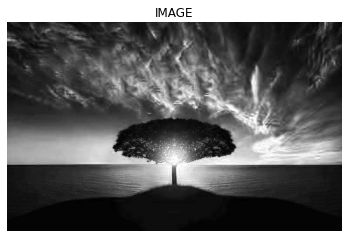

In [ ]:
f = plt.imread('image.jpg')[:,:,0]

def Show(g):
  plt.imshow(np.clip(g, a_min=0, a_max=255), cmap='gray')
  plt.axis('off')
  plt.title("IMAGE")

Show(f)

num_pixels = NumPixels(f)

370080
ratio: 4.81875


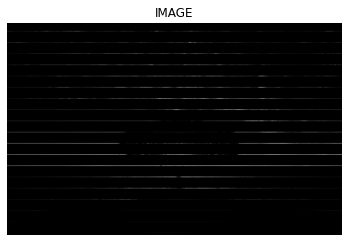

In [ ]:
T = 25
D = 20

ratio = num_pixels/(12*D*16*D)

print(num_pixels)
print("ratio: " + str(ratio))

G = Compression(f, T, D)
new_f = Decompression(G, T, D)

new_num_pixels = NumPixels(new_f)

Show(new_f)

ratio: 7.529296875


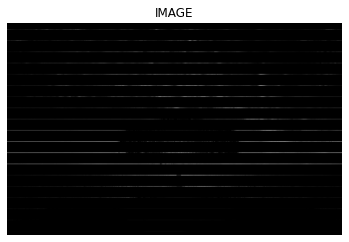

In [ ]:
T = 25
D = 16

ratio = num_pixels/(12*D*16*D)

print("ratio: " + str(ratio))

G = Compression(f, T, D)
new_f = Decompression(G, T, D)

new_num_pixels = NumPixels(new_f)

Show(new_f)

In [ ]:
###  RATIOs can be adjusted by user input using D and T (tile size and size of Fourier blocks to save)